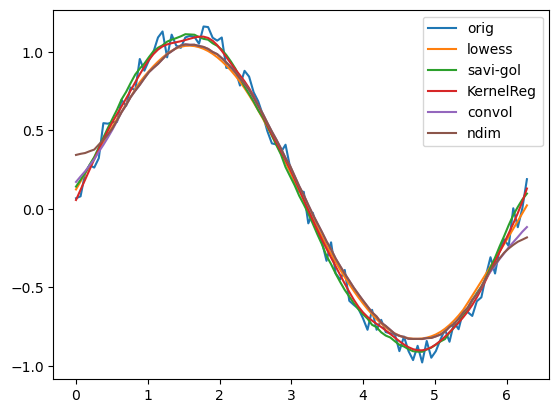

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.nonparametric.kernel_regression import KernelReg
from scipy.signal import savgol_filter
from scipy.ndimage import uniform_filter1d

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2
lowess = sm.nonparametric.lowess(y, x, frac=0.3)

plt.plot(x, y, label = 'orig')
plt.plot(lowess[:, 0], lowess[:, 1], label = "lowess")
yhat = savgol_filter(y, 20, 3, mode='nearest') # window size 51, polynomial order 3
plt.plot(x,yhat, label="savi-gol")

kr = KernelReg(y,x,'c')
y_pred, y_std = kr.fit(x)
plt.plot(x, y_pred, label="KernelReg")

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

plt.plot(x, smooth(y,20), '-', label = "convol")
y_smooth1 = uniform_filter1d(y,size=20)
plt.plot(x,y_smooth1, label='ndim')


plt.legend()
plt.show()


In [12]:
lowess[:,0].shape

(100,)

In [15]:
lowess[:,1].shape

(100,)

In [65]:
def smooth_data_convolve_my_average(arr, span):
    re = np.convolve(arr, np.ones(span * 2 + 1) / (span * 2 + 1), mode="same")

    # The "my_average" part: shrinks the averaging window on the side that 
    # reaches beyond the data, keeps the other side the same size as given 
    # by "span"
    re[0] = np.average(arr[:span])
    for i in range(1, span + 1):
        re[i] = np.average(arr[:i + span])
        re[-i] = np.average(arr[-i - span:])
    return re

def smooth_data_np_average(arr, span):  # my original, naive approach
    return [np.average(arr[val - span:val + span + 1]) for val in range(len(arr))]

def smooth_data_np_convolve(arr, span):
    return np.convolve(arr, np.ones(span * 2 + 1) / (span * 2 + 1), mode="same")

def smooth_data_np_cumsum_my_average(arr, span):
    cumsum_vec = np.cumsum(arr)
    moving_average = (cumsum_vec[2 * span:] - cumsum_vec[:-2 * span]) / (2 * span)

    # The "my_average" part again. Slightly different to before, because the
    # moving average from cumsum is shorter than the input and needs to be padded
    front, back = [np.average(arr[:span])], []
    for i in range(1, span):
        front.append(np.average(arr[:i + span]))
        back.insert(0, np.average(arr[-i - span:]))
    back.insert(0, np.average(arr[-2 * span:]))
    return np.concatenate((front, moving_average, back))

def smooth_data_lowess(arr, span):
    x = np.linspace(0, 1, len(arr))
    return sm.nonparametric.lowess(arr, x, frac=(5*span / len(arr)), return_sorted=False)

def smooth_data_kernel_regression(arr, span):
    # "span" smoothing parameter is ignored. If you know how to 
    # incorporate that with kernel regression, please comment below.
    kr = KernelReg(arr, np.linspace(0, 1, len(arr)), 'c')
    return kr.fit()[0]

def smooth_data_savgol_0(arr, span):  
    return savgol_filter(arr, span * 2 + 1, 0)

def smooth_data_savgol_1(arr, span):  
    return savgol_filter(arr, span * 2 + 1, 1)

def smooth_data_savgol_2(arr, span):  
    return savgol_filter(arr, span * 2 + 1, 2)

def smooth_data_fft(arr, span):  # the scaling of "span" is open to suggestions
    w = fftpack.rfft(arr)
    spectrum = w ** 2
    cutoff_idx = spectrum < (spectrum.max() * (1 - np.exp(-span / 2000)))
    w[cutoff_idx] = 0
    return fftpack.irfft(w)

In [66]:
size = 1000
x = np.linspace(0, 4 * np.pi, size)
y = np.sin(x) + np.random.random(size) * 0.2
data = {"x": x, "y": y}

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from tsmoothie.smoother import *

x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2



# plot the smoothed timeseries with intervals
plt.figure(figsize=(11,6))
plt.fill_between(range(len(smoother.data[0])), low[0], up[0], alpha=0.3)

ModuleNotFoundError: No module named 'tsmoothie'